In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [8]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
df.shape

(2111, 17)

In [11]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

(array([  1.,   1.,  22.,  76., 217., 172., 139., 232., 159., 207.,  95.,
         70., 231.,  44.,  17.,  32.,  31.,  61.,  49.,  17.,  35.,  27.,
         16.,   7.,  23.,  32.,  26.,  18.,  20.,   5.,   4.,   8.,   3.,
          1.,   1.,   2.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   5.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([14.  , 14.94, 15.88, 16.82, 17.76, 18.7 , 19.64, 20.58, 21.52,
        22.46, 23.4 , 24.34, 25.28, 26.22, 27.16, 28.1 , 29.04, 29.98,
        30.92, 31.86, 32.8 , 33.74, 34.68, 35.62, 36.56, 37.5 , 38.44,
        39.38, 40.32, 41.26, 42.2 , 43.14, 44.08, 45.02, 45.96, 46.9 ,
        47.84, 48.78, 49.72, 50.66, 51.6 , 52.54, 53.48, 54.42, 55.36,
        56.3 , 57.24, 58.18, 59.12, 60.06, 61.  ]),
 <BarContainer object of 50 artists>)

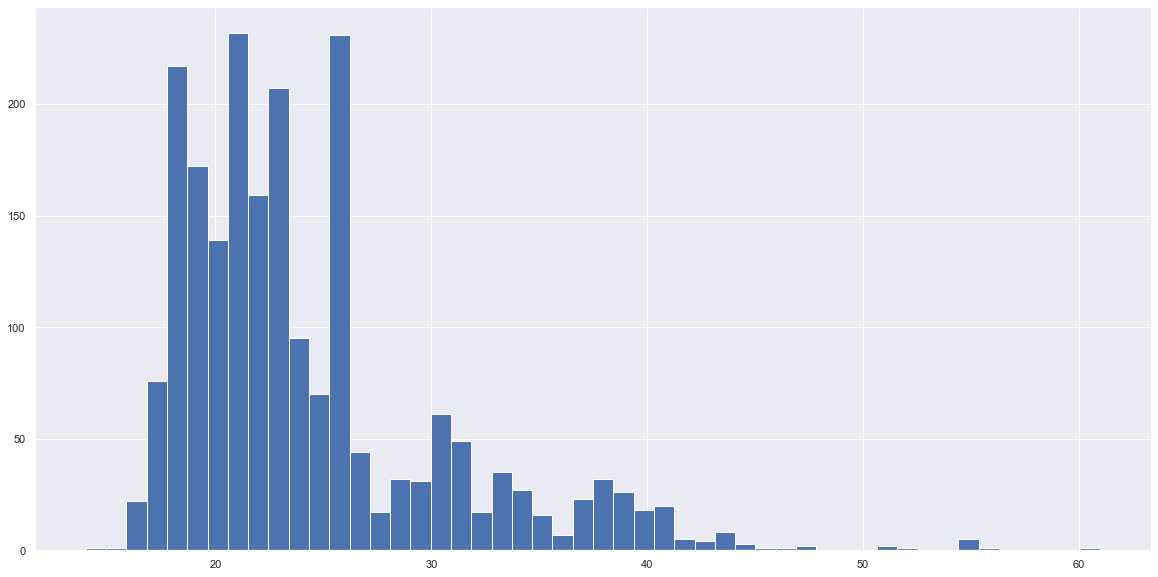

In [25]:
plt.hist(df["Age"], bins= "auto")